c:\Users\UYEN MY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step


c:\Users\UYEN MY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\UYEN MY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


c:\Users\UYEN MY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\UYEN MY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
Average RMSE: 31939.506769713138
Average R-squared: 38.90%


c:\Users\UYEN MY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
RMSE: 32204.90895290682
Accuracy: 37.63%
     Actual     Predicted
0   64563.0  63892.019531
1   14560.0  24314.640625
2  168000.0  63273.007812
3   36700.0  75523.554688
4   68500.0  60845.207031
5   27728.0  31279.140625
6   15022.0  36464.710938
7   35000.0  36442.003906
8   70828.0  83366.234375
9   97500.0  99483.460938


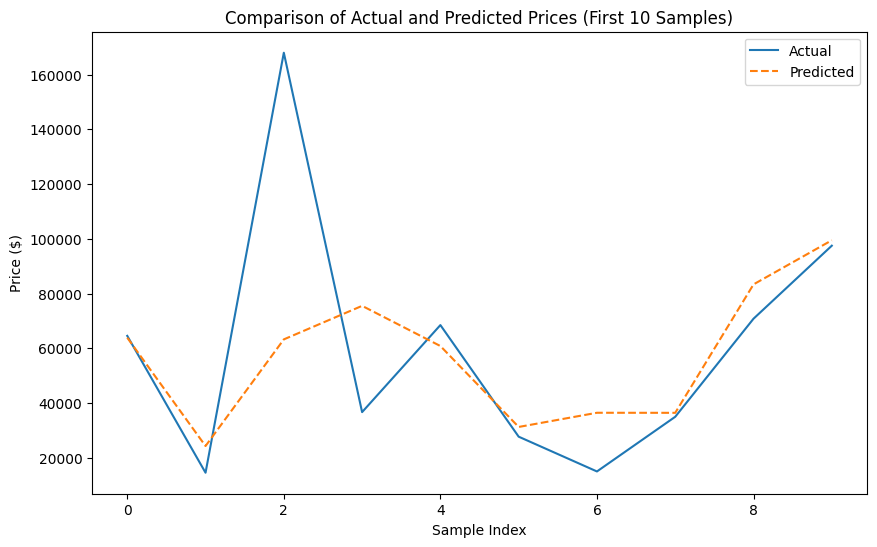

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Đọc dữ liệu
train_data = pd.read_csv(r'C:\KHDL_CK\Clean\Dat_new\train_data.csv')
test_data = pd.read_csv(r'C:\KHDL_CK\Clean\Dat_new\test_data.csv')

# Chỉ giữ lại 5 đặc trưng: price($), Scope of delivery, Year of production, Case material, Reference number
train_data = train_data[['price($)', 'name', 'Movement', 'Scope of delivery', 'Year of production', 'Case material', 'Reference number', 'Case area(mm2)']]
test_data = test_data[['price($)', 'name', 'Movement', 'Scope of delivery', 'Year of production', 'Case material', 'Reference number', 'Case area(mm2)']]

# Tách dữ liệu thành X và y
X_train = train_data[['name', 'Movement', 'Scope of delivery', 'Year of production', 'Case material', 'Reference number', 'Case area(mm2)']]
y_train = train_data['price($)']
X_test = test_data[['name', 'Movement', 'Scope of delivery', 'Year of production', 'Case material', 'Reference number', 'Case area(mm2)']]
y_test = test_data['price($)']

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Thiết lập k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Huấn luyện mô hình với k-fold cross-validation
rmse_scores = []
r2_scores = []

for train_index, val_index in kf.split(X_train):
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    model = build_model()
    model.fit(X_tr, y_tr, epochs=100, batch_size=32, verbose=0)
    
    y_val_pred = model.predict(X_val)
    rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
    r2_scores.append(r2_score(y_val, y_val_pred))

print(f'Average RMSE: {np.mean(rmse_scores)}')
print(f'Average R-squared: {np.mean(r2_scores) * 100:.2f}%')

# Huấn luyện mô hình với toàn bộ dữ liệu huấn luyện
final_model = build_model()
final_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Dự đoán trên tập kiểm tra
y_pred = final_model.predict(X_test)

# Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Tính toán độ chính xác bằng R-squared
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f'Accuracy: {accuracy:.2f}%')

# In ra kết quả độ chính xác của 10 dòng đầu trong file test
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(results.head(10))

# Vẽ biểu đồ so sánh độ chính xác của mẫu dự đoán và mẫu thực tế (10 mẫu đầu tiên)
results_10 = results.head(10)

plt.figure(figsize=(10, 6))
plt.plot(results_10['Actual'].values, label='Actual')
plt.plot(results_10['Predicted'].values, label='Predicted', linestyle='--')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.title('Comparison of Actual and Predicted Prices (First 10 Samples)')
plt.show()
